<a href="https://colab.research.google.com/github/Mumuste21mend/masters-computer-vision-1/blob/master/Mulit/tp4/tp4_mul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import sys
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
img = cv.imread("/content/E_CNijTX0AMNw57.jpg",0)

In [6]:
if img is None :
     sys.exit("Could not read image\n")
else:
    img32 = img.astype('float32')
    print(img32.shape)
    padded_img = np.pad(img32,((0,8-img.shape[0]%8),(0,8-img.shape[1]%8)),'constant')
    dct = padded_img.copy()
    mat = np.fromfunction(lambda i, j : 1+(1+i+j)  , (8,8) , dtype =int)
    print(dct.shape[0]/8)
    print(dct.shape[1]/8)

(2048, 1745)
257.0
219.0


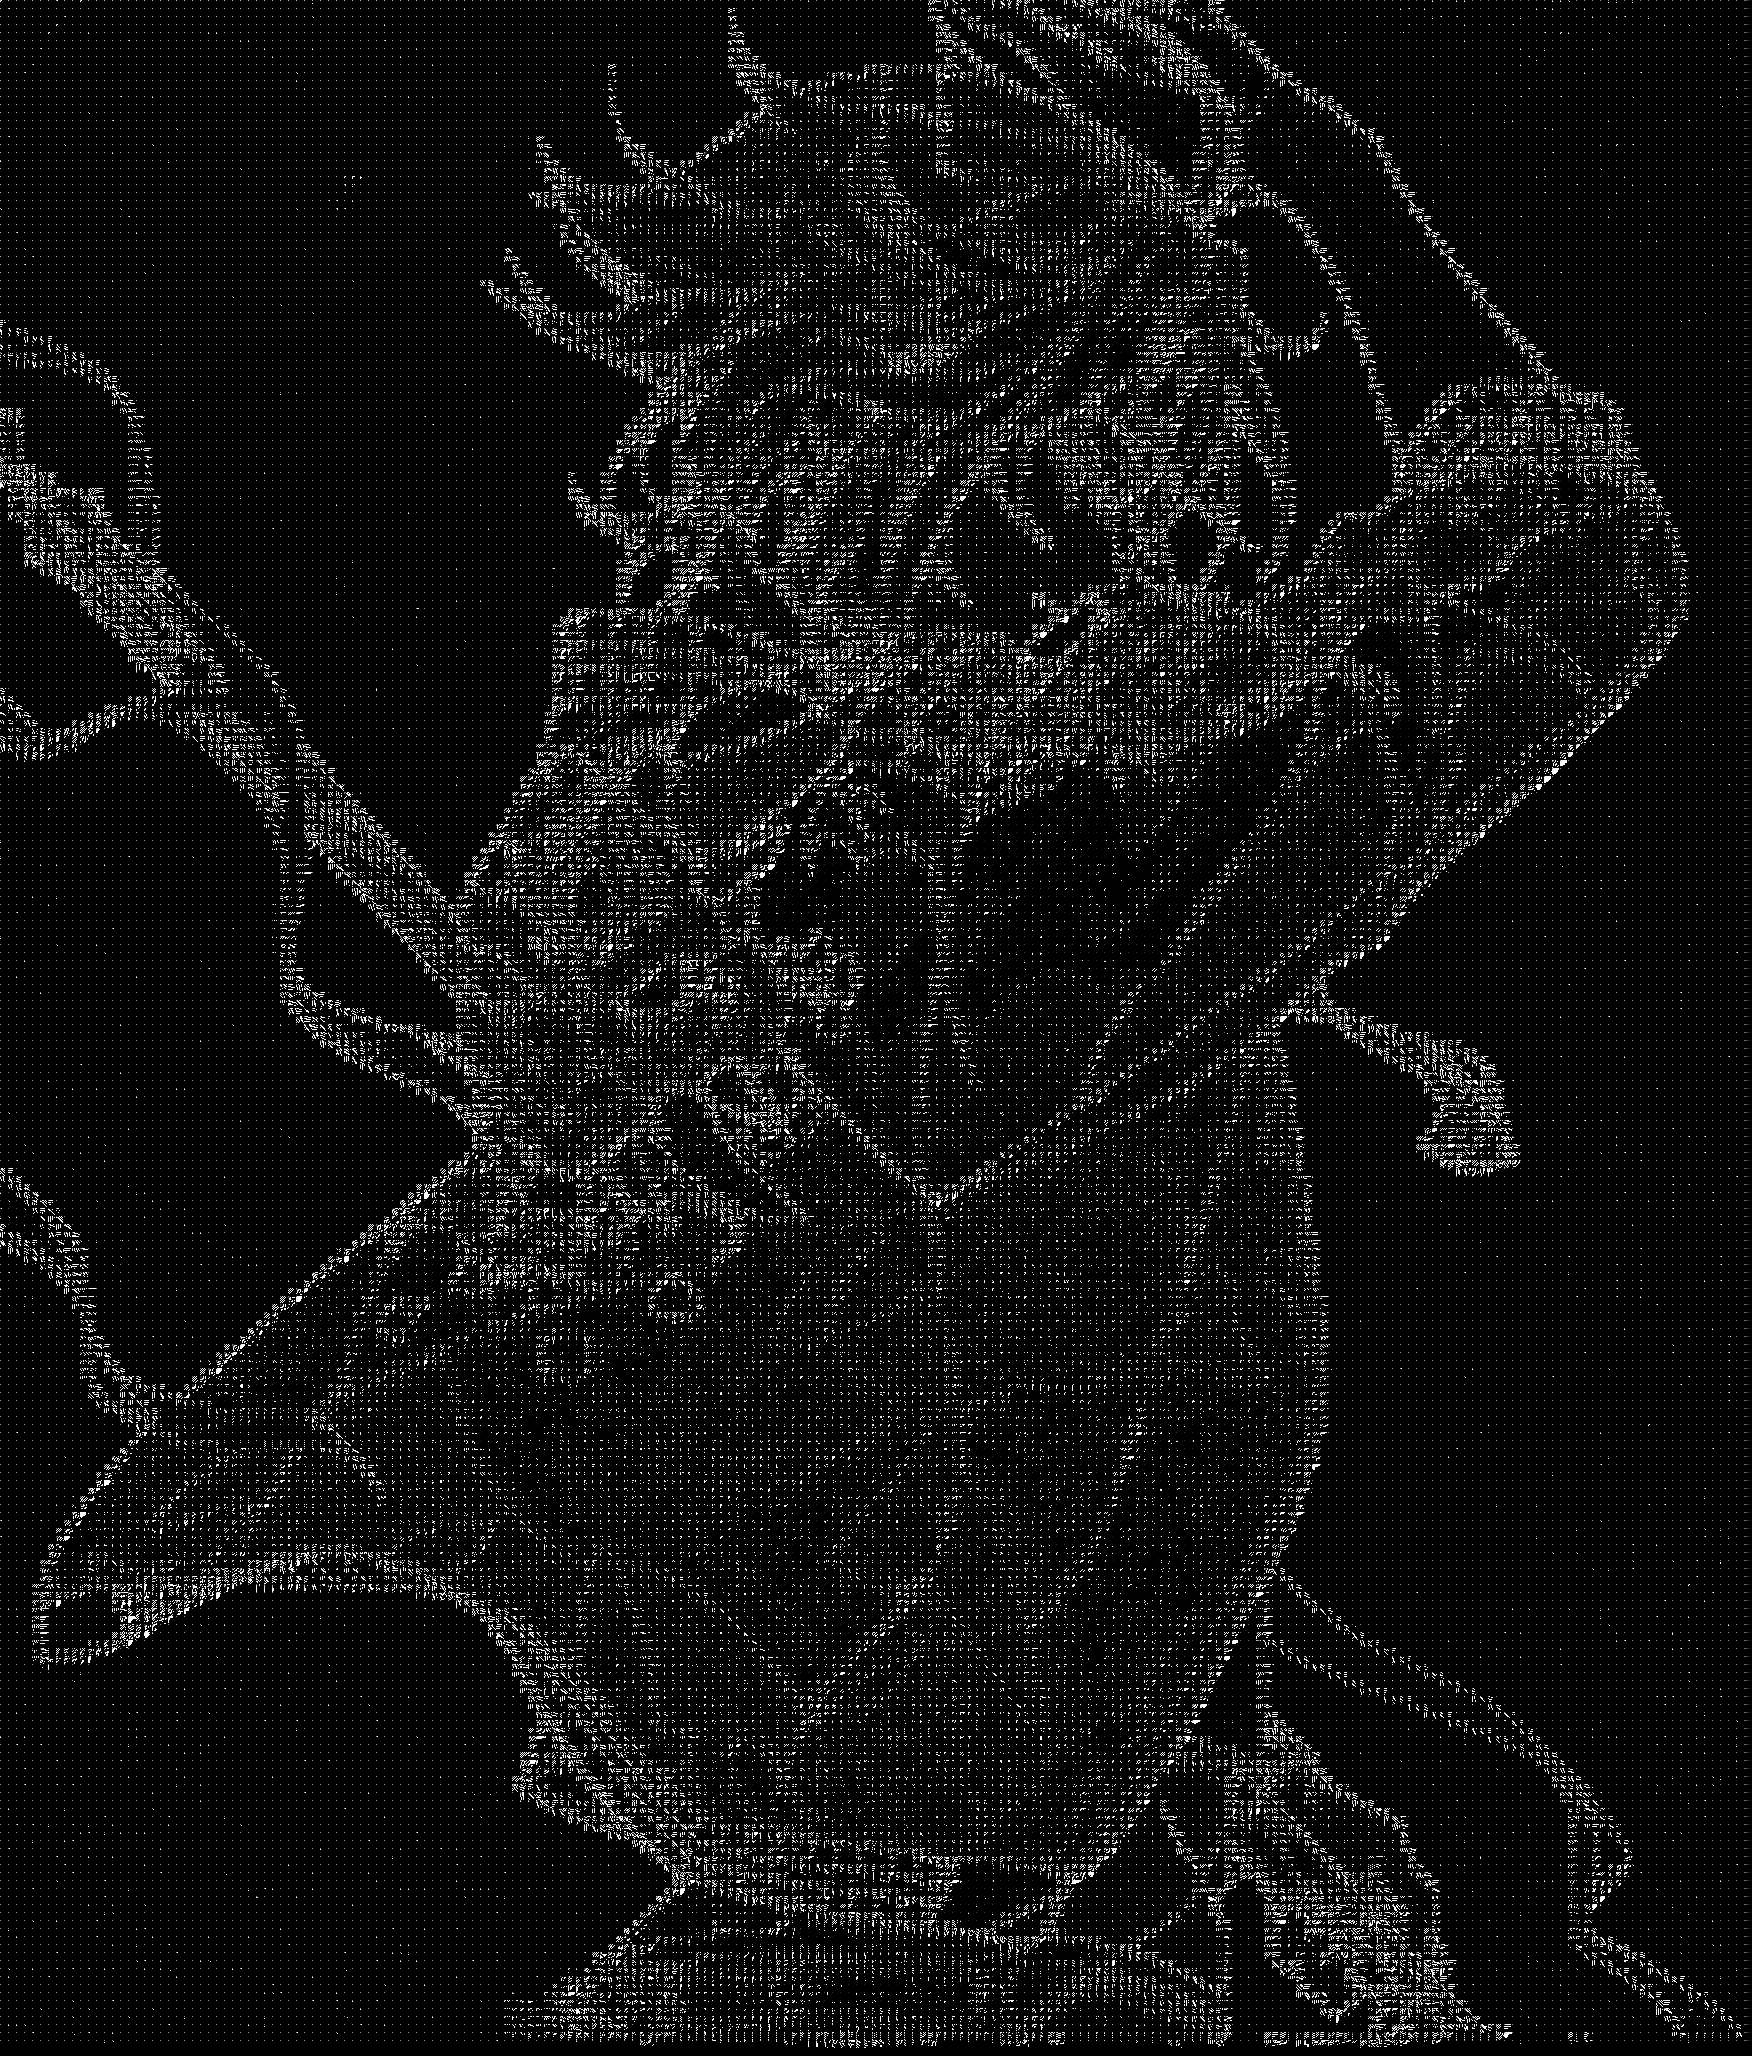

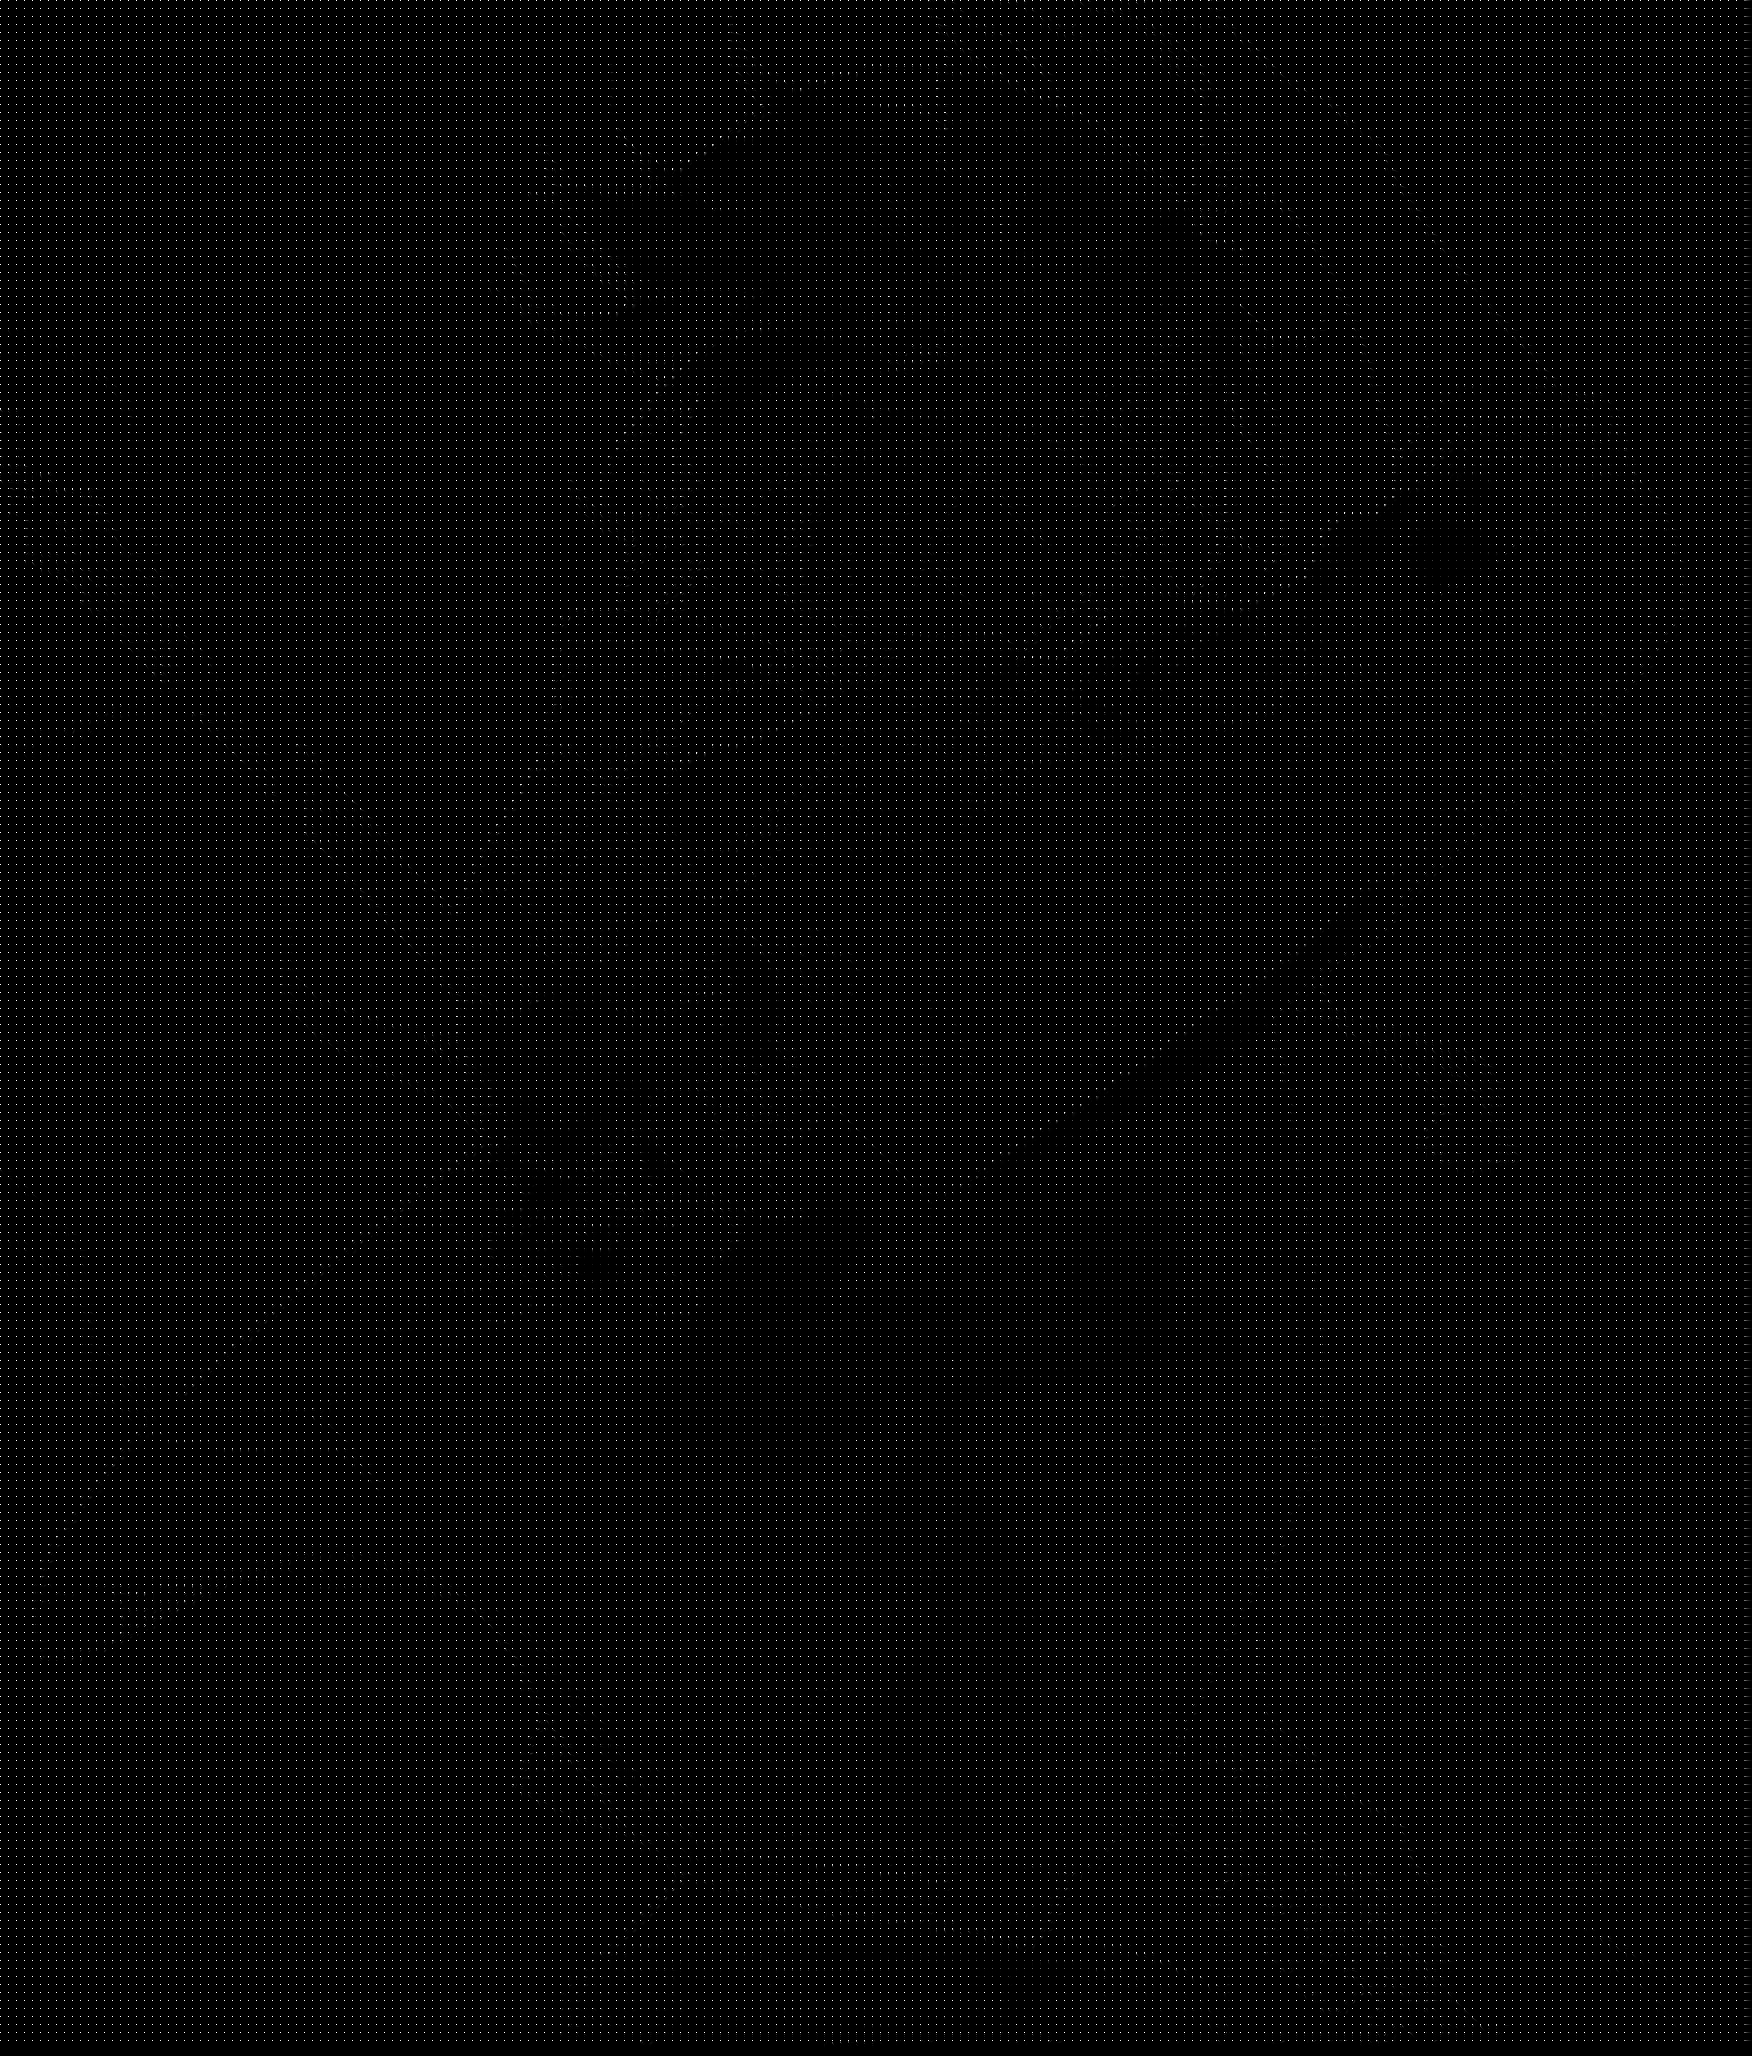

[[184 255   0 ...  25  15   7]
 [255   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[ 9.5200000e+02 -1.0967120e+00  0.0000000e+00 ...  2.5871813e+01
   1.5593211e+01  7.0660896e+00]
 [-1.2777712e+00  0.0000000e+00  6.5122962e-02 ...  5.8137368e-02
   3.5595987e-02  1.6332021e-02]
 [ 0.0000000e+00 -5.1327985e-02  0.0000000e+00 ... -2.8515670e-02
  -1.7677639e-02 -8.1927637e-03]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [7]:
for i in range(int(dct.shape[0]/8)):
    for j in range(int(dct.shape[1]/8)):
        dct[i*8:8*(i+1)][:,j*8:8*(j+1)] = cv.dct(padded_img[i*8:8*(i+1)][:,j*8:8*(j+1)])
        dct[i*8:8*(i+1)][:,j*8:8*(j+1)] = dct[i*8:8*(i+1)][:,j*8:8*(j+1)]/mat

dct2 = np.uint8(dct)
cv2_imshow(dct2)
cv2_imshow(dct)
print(dct2)
print(dct)
k = cv.waitKey(0)
idct = np.copy(dct2)

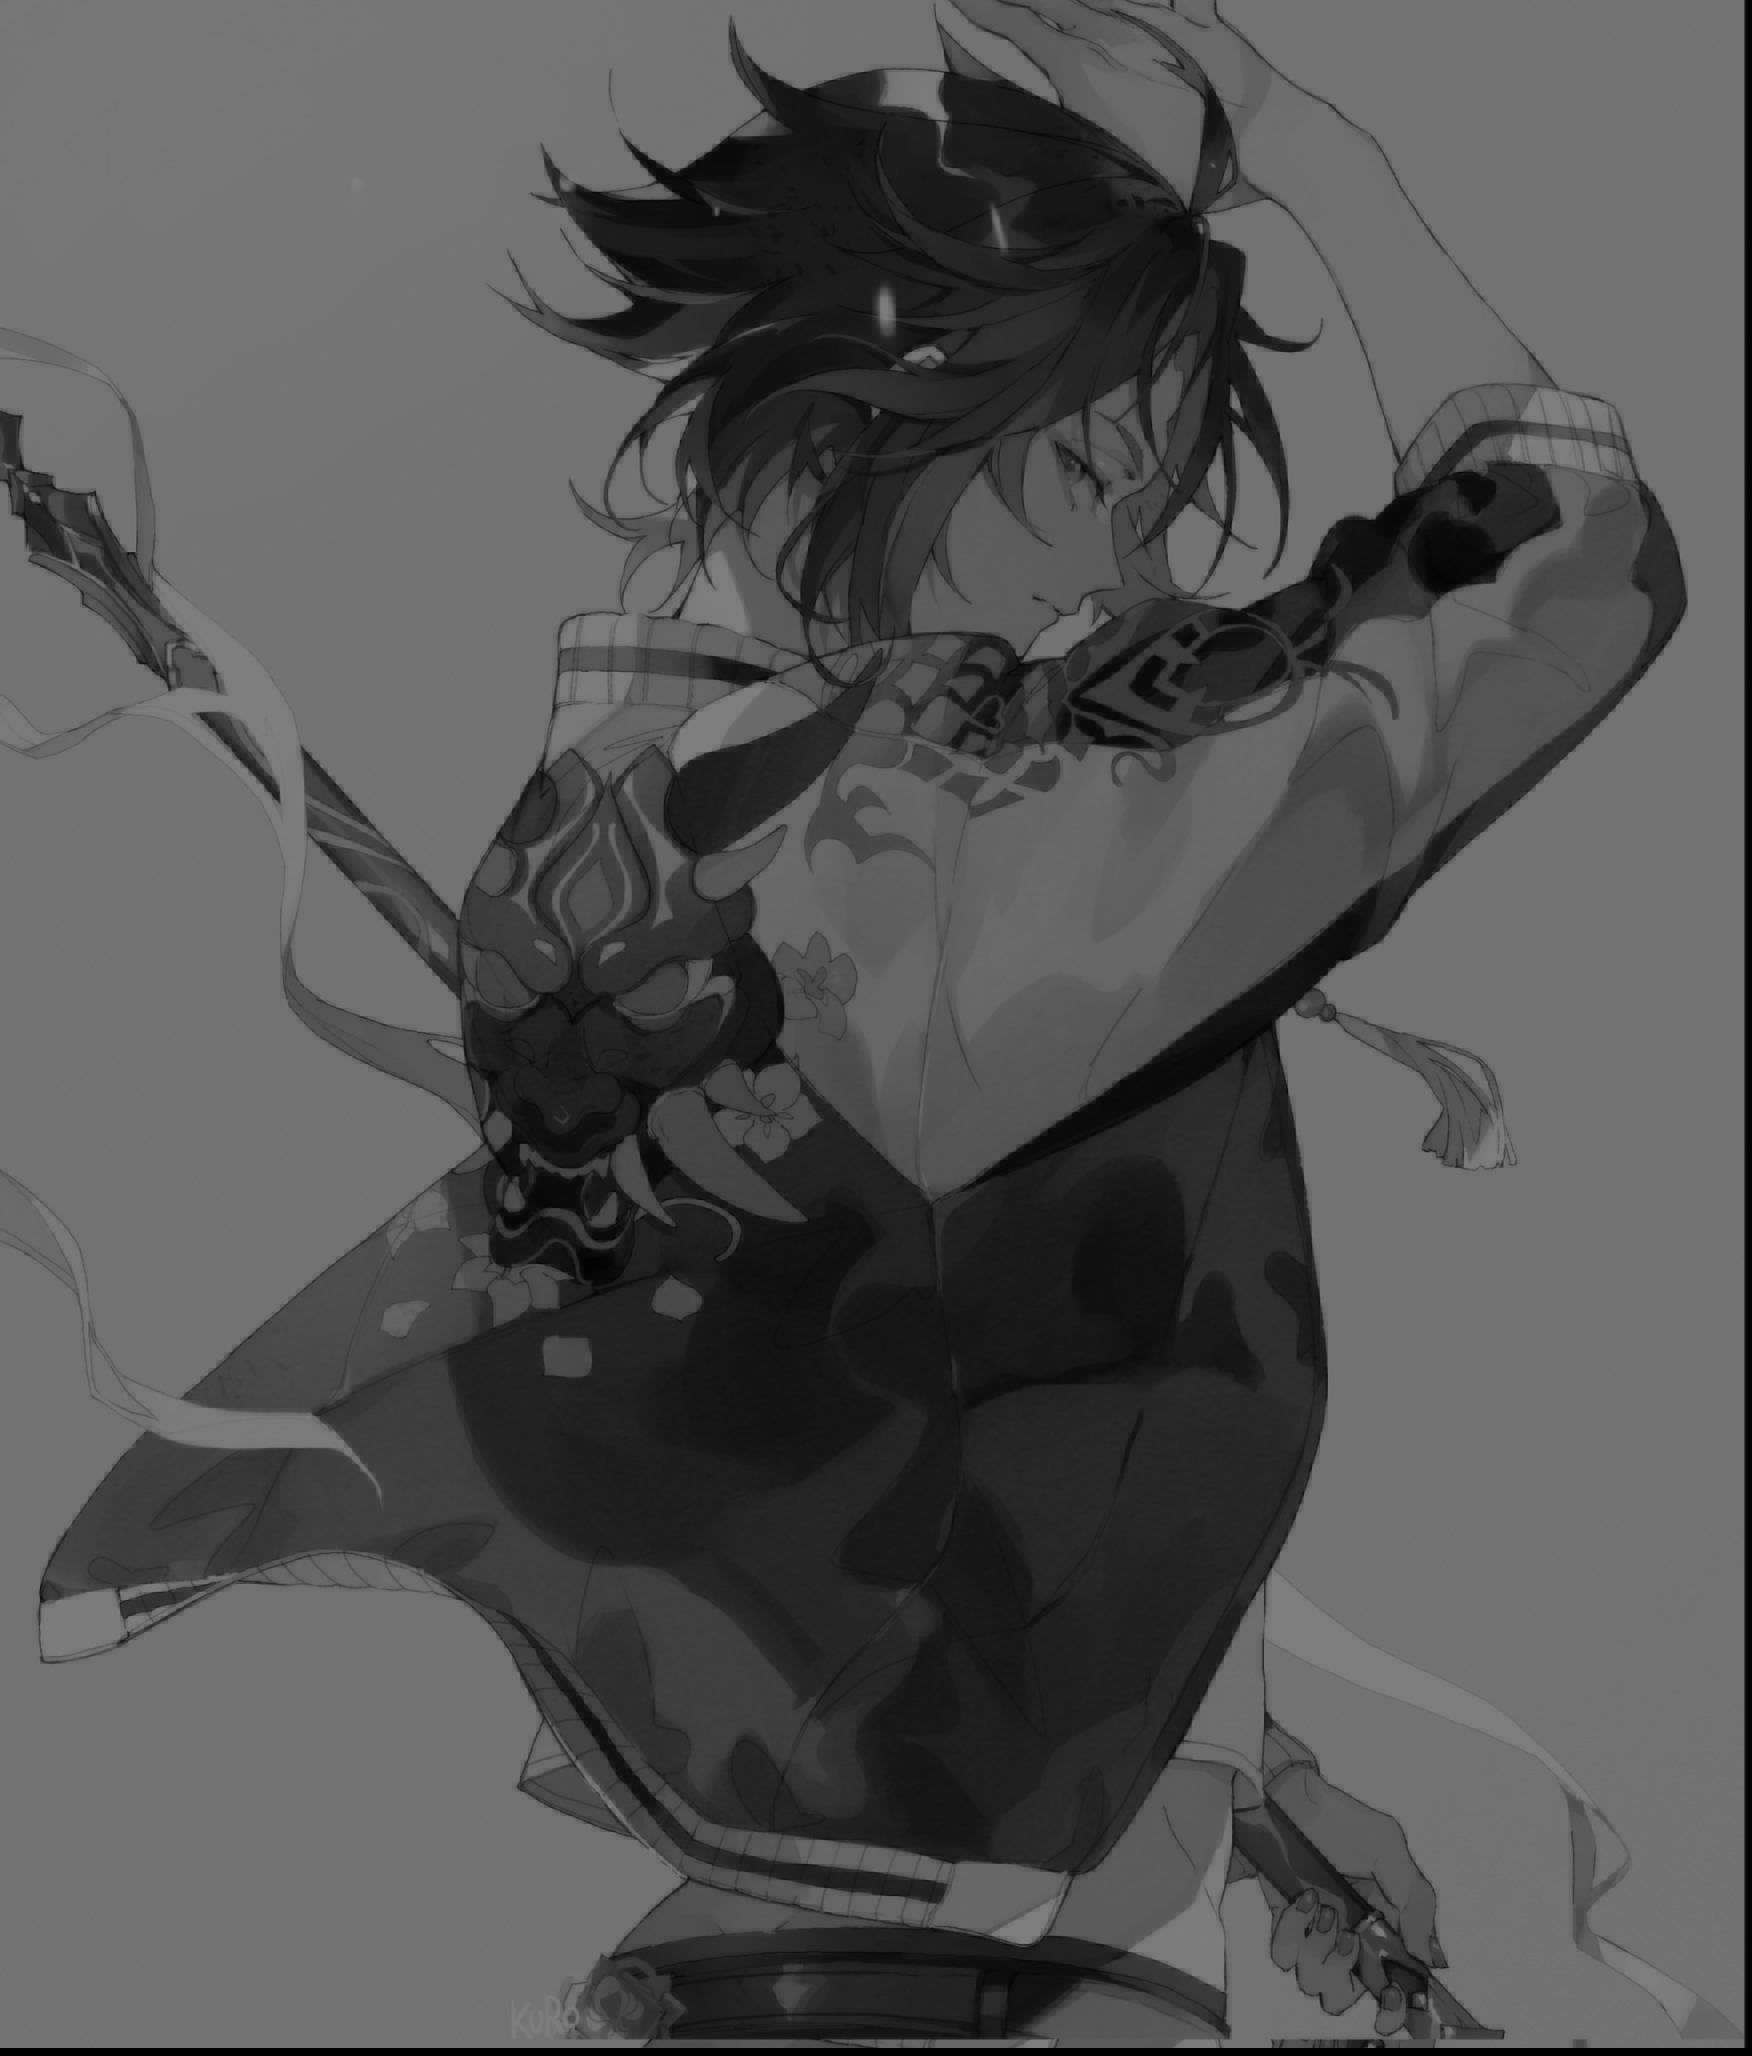

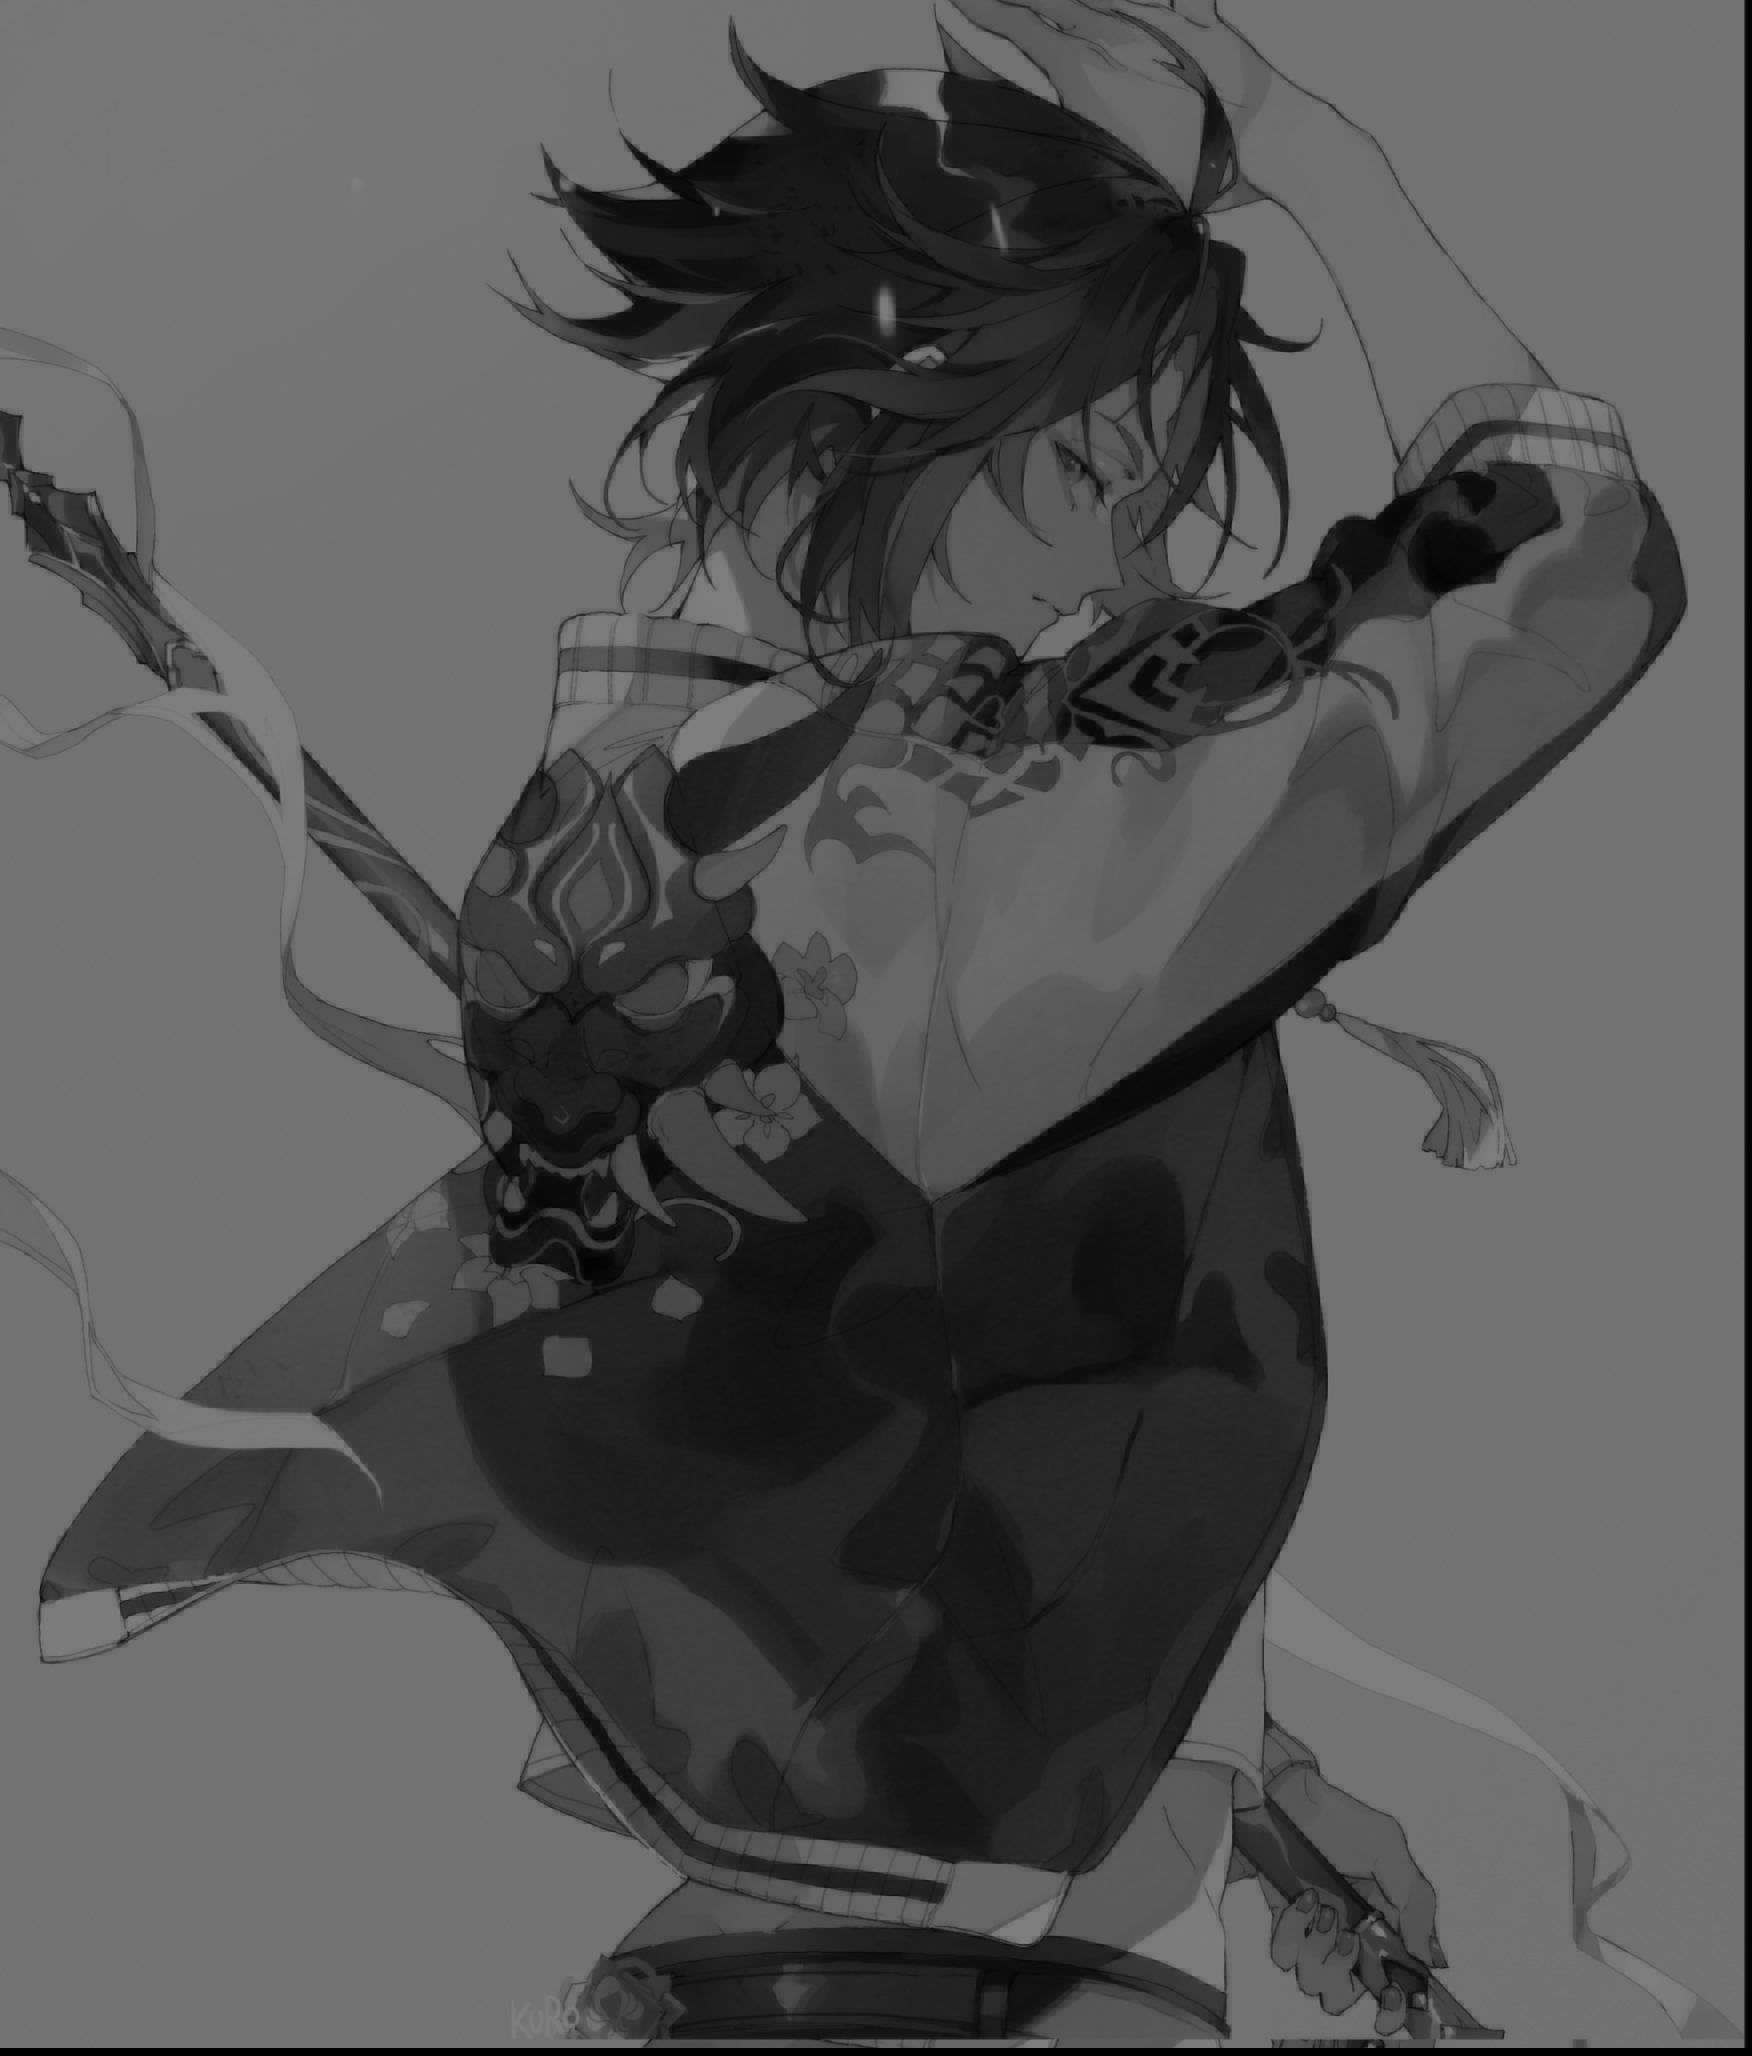

In [8]:
for i in range(int(dct.shape[0]/8)):
    for j in range(int(dct.shape[1]/8)):
        idct[i*8:8*(i+1)][:,j*8:8*(j+1)] = idct[i*8:8*(i+1)][:,j*8:8*(j+1)]*mat
        idct[i*8:8*(i+1)][:,j*8:8*(j+1)] = cv.idct(dct[i*8:8*(i+1)][:,j*8:8*(j+1)])
        
    
idct2 = np.uint8(idct)
cv2_imshow(idct2)
cv2_imshow(idct)
k = cv.waitKey(0)